In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


In [2]:
'''rm submission.csv'''

'rm submission.csv'

In [3]:
'''df.to_excel("mlp_data.xlsx",sheet_name='mlp_data')  '''  

'df.to_excel("mlp_data.xlsx",sheet_name=\'mlp_data\')  '

In [4]:
'''dummy submission here'''

df=pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
from sklearn.dummy import DummyClassifier
x = df.drop('target', axis = 1)
y = df['target']

model = DummyClassifier().fit(x,y)

x_test = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')
y_predict = model.predict(x_test)
                     
'''submission = pd.DataFrame({'id':range(0,x_test.shape[0]),
                          'target':y_predict})
                     
submission.to_csv('submission.csv',index=False)'''

"submission = pd.DataFrame({'id':range(0,x_test.shape[0]),\n                          'target':y_predict})\n                     \nsubmission.to_csv('submission.csv',index=False)"

# **ASSESSMENT**

In [5]:
df = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')

In [6]:
df.shape

(39211, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [8]:
df.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


> ## **Basic Assessment**




In [9]:
df.isnull().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

In [10]:
df['job'].value_counts()

job
blue-collar      7776
management       7462
technician       6078
admin.           4116
services         3325
self-employed    1862
retired          1824
entrepreneur     1805
unemployed       1685
housemaid        1656
student          1393
Name: count, dtype: int64

In [11]:
df[df['job'].isnull()]

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
256,2009-08-19,40,NaN,married,tertiary,no,119,no,no,cellular,258,2,-1,0,NaN,no
490,2010-05-29,41,NaN,single,secondary,no,646,yes,no,NaN,40,2,-1,0,NaN,no
564,2008-05-28,57,NaN,married,NaN,no,327,yes,no,NaN,74,2,-1,0,NaN,no
768,2010-08-04,52,NaN,married,NaN,no,1571,no,no,cellular,164,1,-1,0,NaN,no
790,2009-06-16,54,NaN,married,secondary,no,1241,no,no,NaN,97,6,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38048,2009-06-11,51,NaN,married,NaN,no,12,no,no,NaN,45,1,-1,0,NaN,no
38549,2009-08-21,36,NaN,married,primary,no,0,no,no,cellular,238,2,-1,0,NaN,no
38597,2009-06-05,59,NaN,married,primary,no,1470,no,no,NaN,74,1,-1,0,NaN,no
38637,2008-08-25,52,NaN,married,secondary,no,142,no,no,cellular,112,6,-1,0,NaN,no


In [12]:
df[df['contact'].isnull()]

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
6,2009-05-15,46,blue-collar,married,secondary,no,668,yes,no,NaN,1263,2,-1,0,NaN,yes
7,2010-05-08,37,admin.,married,secondary,no,14,yes,no,NaN,176,2,-1,0,NaN,no
9,2010-05-21,31,technician,married,secondary,no,589,yes,yes,NaN,151,1,-1,0,NaN,no
11,2009-05-15,46,management,single,secondary,no,244,yes,no,NaN,244,1,-1,0,NaN,no
14,2008-05-07,33,management,single,tertiary,no,54,no,no,NaN,262,2,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39196,2010-06-04,50,unemployed,married,secondary,no,306,yes,no,NaN,117,1,-1,0,NaN,no
39199,2010-05-27,40,blue-collar,married,primary,yes,-56,yes,no,NaN,316,1,-1,0,NaN,no
39204,2008-05-28,32,management,married,tertiary,no,4307,yes,no,NaN,91,3,-1,0,NaN,no
39205,2009-11-12,34,admin.,married,tertiary,no,899,yes,no,NaN,114,1,170,3,failure,yes


In [13]:
df['education'].value_counts()

education
secondary    19584
tertiary     11615
primary       6545
Name: count, dtype: int64

In [14]:
df[df['education'].isnull()]

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
23,2008-07-03,35,blue-collar,married,NaN,no,-400,yes,yes,NaN,85,1,-1,0,NaN,no
25,2009-05-05,47,blue-collar,married,NaN,no,1506,yes,no,NaN,92,1,-1,0,NaN,no
38,2009-02-05,26,student,single,NaN,no,198,no,no,cellular,161,1,-1,0,NaN,no
41,2008-06-04,41,technician,single,NaN,no,454,yes,no,NaN,267,2,-1,0,NaN,no
60,2010-05-13,43,blue-collar,married,NaN,no,-633,yes,yes,NaN,277,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39066,2010-05-26,25,student,single,NaN,no,3,no,no,cellular,170,1,-1,0,NaN,yes
39088,2010-05-11,39,admin.,single,NaN,no,0,yes,no,cellular,62,1,-1,0,NaN,no
39143,2008-10-20,77,retired,married,NaN,no,1807,no,no,telephone,373,1,-1,0,NaN,yes
39158,2009-07-23,42,blue-collar,married,NaN,no,149,yes,no,telephone,329,3,-1,0,NaN,no


> ## **EDA Process**

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


x = df.drop('target',axis=1)
y = df['target']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.


`Numerical Variables` : **age, balance, duration, campaign, pdays, previous**

`Categorical Variables`:  **last contact date,job,marital,education,default,housing,loan,contact,poutcome,target**


> ## Age
> 
> **conclusion**
>  1. As it can be seen in below observations, data for age is positively skewed
>  2. There are many outliers on the maximum side
>  3. out of 1002 outliers 146 belongs to student job title which seems absurd

In [16]:
df['age'].describe()

count    39211.000000
mean        42.120247
std         12.709352
min         18.000000
25%         33.000000
50%         40.000000
75%         50.000000
max         95.000000
Name: age, dtype: float64

<Axes: ylabel='Frequency'>

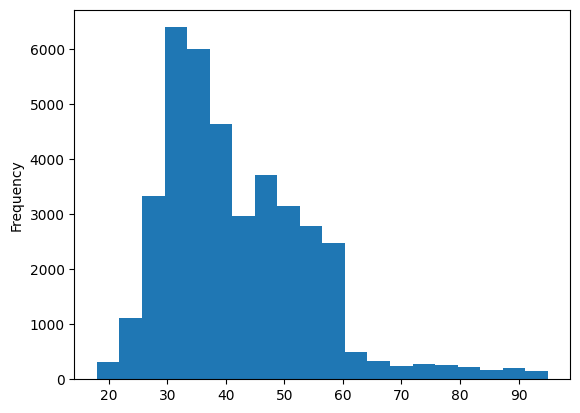

In [17]:
df['age'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

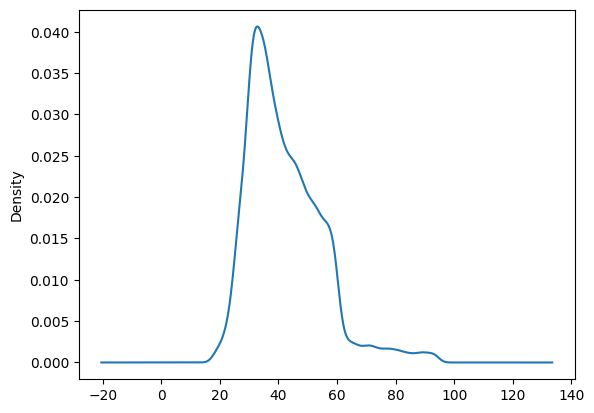

In [18]:
df['age'].plot(kind='kde')

In [19]:
df['age'].skew()

1.124277825963419

<Axes: >

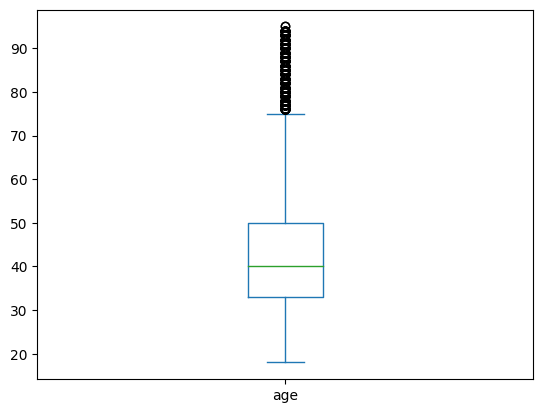

In [20]:
df['age'].plot(kind='box')

In [21]:
df[(df['age'] > 75)]

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
19,2009-10-30,86,student,divorced,primary,yes,22272,no,no,cellular,283,44,599,234,success,no
106,2010-10-13,83,retired,single,primary,no,1965,no,no,telephone,1003,3,-1,0,NaN,yes
160,2010-03-09,80,entrepreneur,married,secondary,yes,68191,no,no,cellular,1505,7,596,119,other,yes
167,2009-08-12,76,retired,divorced,primary,no,86,no,no,cellular,192,1,-1,0,NaN,no
213,2009-03-02,93,housemaid,single,secondary,no,29594,no,yes,telephone,1586,4,31,116,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39118,2009-10-22,85,housemaid,divorced,tertiary,yes,98141,yes,yes,cellular,1780,39,728,209,failure,yes
39123,2008-12-01,88,unemployed,single,secondary,yes,36960,yes,no,telephone,1631,9,578,267,other,no
39143,2008-10-20,77,retired,married,NaN,no,1807,no,no,telephone,373,1,-1,0,NaN,yes
39147,2008-12-01,91,unemployed,divorced,primary,yes,16507,no,yes,cellular,3182,31,459,22,other,no


In [22]:
df[(df['age'] > 75)].shape

(1002, 16)

In [23]:
df[(df['age'] > 75)]['job'].value_counts()

job
retired          187
housemaid        182
self-employed    173
unemployed       154
entrepreneur     152
student          146
management         6
Name: count, dtype: int64

In [24]:
df['age'].isnull().sum()

0

> ## Balance
> 
> **conclusion**
> 
> * the balance data is extremely positively skewed (right-skewed)
> * The mean balance for clients who subscribed is approximately 15,542 euros, significantly higher than the overall mean balance of 5,442 euros across all clients. This suggests that clients who subscribe to deposits generally have higher balances.
> 

In [25]:
df['balance'].describe()

count     39211.000000
mean       5441.781719
std       16365.292065
min       -8019.000000
25%          98.000000
50%         549.000000
75%        2030.000000
max      102127.000000
Name: balance, dtype: float64

<Axes: ylabel='Frequency'>

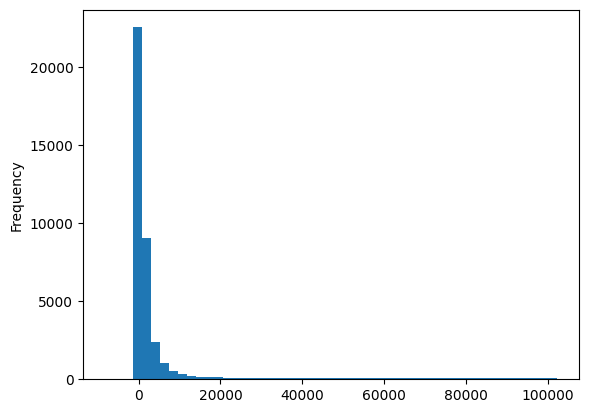

In [26]:
df['balance'].plot(kind='hist',bins=50)

<Axes: ylabel='Density'>

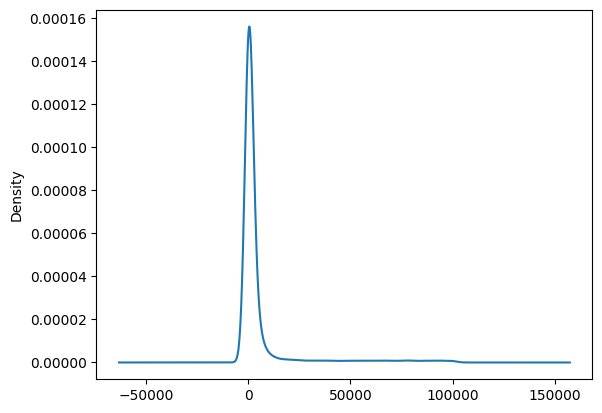

In [27]:
df['balance'].plot(kind='kde')

In [28]:
df['balance'].skew()

4.0635870169871

<Axes: >

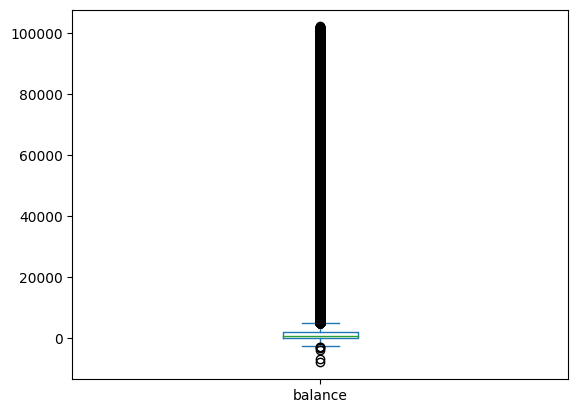

In [29]:
df['balance'].plot(kind='box')

In [30]:
df[(df['target']=='yes')]['balance'].describe()

count      5827.000000
mean      15542.540072
std       27234.079387
min       -3058.000000
25%         354.000000
50%        1604.000000
75%       13014.000000
max      101892.000000
Name: balance, dtype: float64

In [31]:
df['balance'].isnull().sum()

0

> ## Duration
> 
> **conclusion**
> * calls with longer duration tends to a successfull subscription.
> * the data is extremely right skewed.
> 

In [32]:
df['duration'].describe()

count    39211.000000
mean       439.062789
std        769.096291
min          0.000000
25%        109.000000
50%        197.000000
75%        380.000000
max       4918.000000
Name: duration, dtype: float64

<Axes: ylabel='Frequency'>

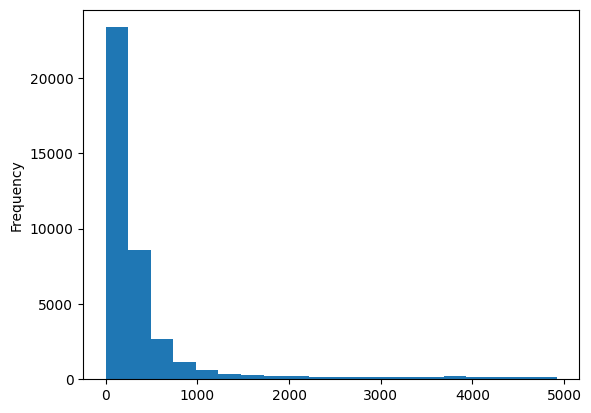

In [33]:
df['duration'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

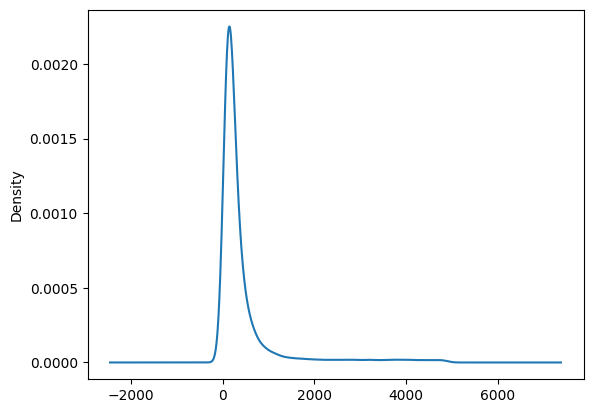

In [34]:
df['duration'].plot(kind='kde')

In [35]:
df['duration'].skew()

3.7005849290063417

<Axes: >

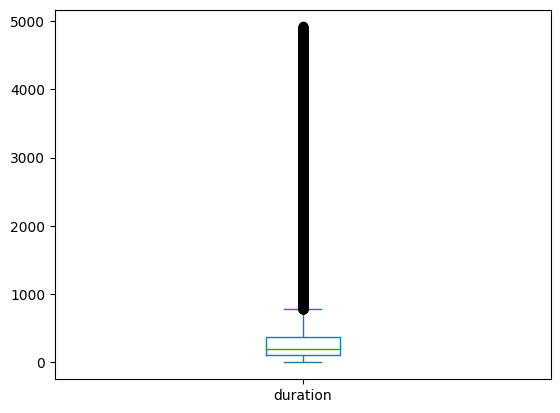

In [36]:
df['duration'].plot(kind='box')

In [37]:
df[(df['target']=='yes')]['duration'].describe()

count    5827.000000
mean     1071.077570
std      1182.646374
min         8.000000
25%       285.000000
50%       589.000000
75%      1242.500000
max      4916.000000
Name: duration, dtype: float64

In [38]:
df['duration'].isnull().sum()

0

> ## Campaign
> 
> **conclusion**
> 1. number of contacts is higher for the clients who showed intrest
> 2. right skewness can be seen
> 

In [39]:
df['campaign'].describe()

count    39211.000000
mean         5.108770
std          9.890153
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         63.000000
Name: campaign, dtype: float64

<Axes: ylabel='Frequency'>

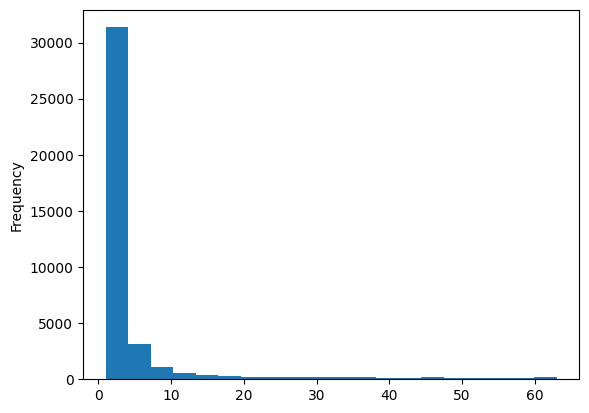

In [40]:
df['campaign'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

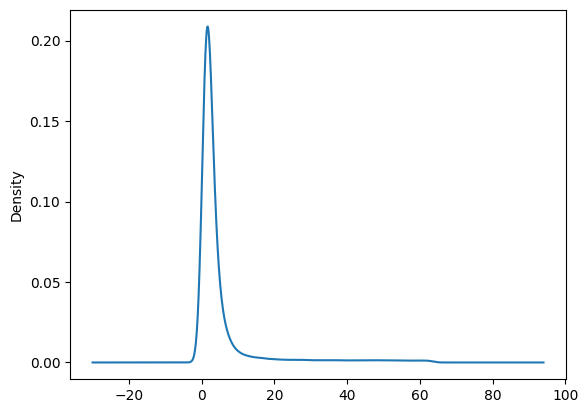

In [41]:
df['campaign'].plot(kind='kde')

In [42]:
df['campaign'].skew()

3.839592516972888

<Axes: >

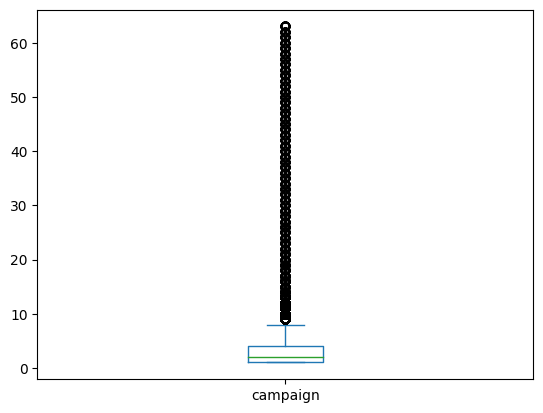

In [43]:
df['campaign'].plot(kind='box')

In [44]:
df[(df['target']=='yes')]['campaign'].describe()

count    5827.000000
mean       10.250558
std        16.253401
min         1.000000
25%         1.000000
50%         2.000000
75%         9.000000
max        63.000000
Name: campaign, dtype: float64

In [45]:
df[(df['target']=='no')]['campaign'].describe()

count    33384.000000
mean         4.211299
std          7.960217
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         63.000000
Name: campaign, dtype: float64

In [46]:
df['campaign'].isnull().sum()

0

> ##  Pdays
> 
> **conclusion**
>  A large portion of clients (based on the percentiles) were contacted for the first time in this campaign

In [47]:
df['pdays'].describe()

count    39211.000000
mean        72.256051
std        160.942593
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

<Axes: ylabel='Frequency'>

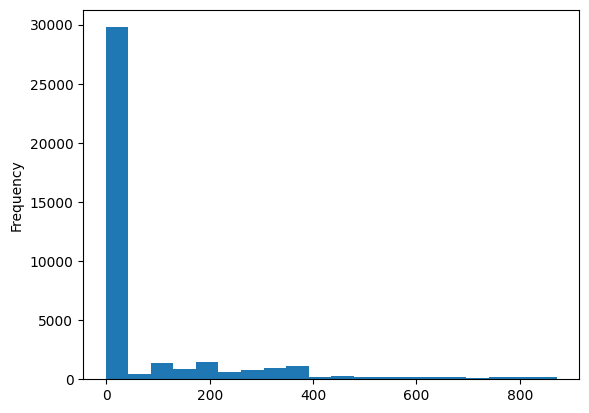

In [48]:
df['pdays'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

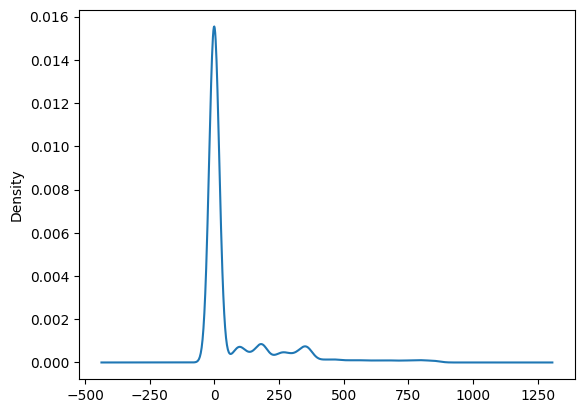

In [49]:
df['pdays'].plot(kind='kde')

In [50]:
df['pdays'].skew()

2.6117734927706215

<Axes: >

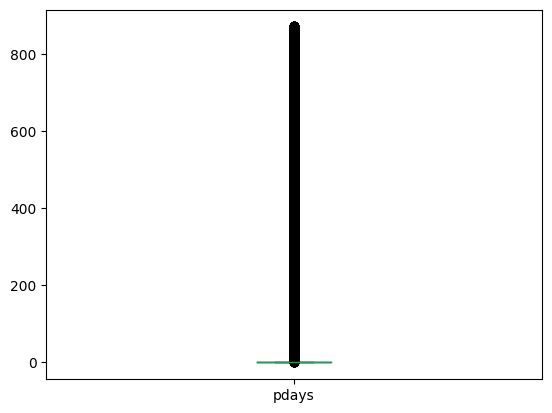

In [51]:
df['pdays'].plot(kind='box')

In [52]:
df[(df['target']=='yes')]['pdays'].describe()

count    5827.000000
mean      171.689720
std       237.463488
min        -1.000000
25%        -1.000000
50%        70.000000
75%       271.500000
max       871.000000
Name: pdays, dtype: float64

In [53]:
df['pdays'].isnull().sum()

0

> ## Previous
> 
> **conclusion**
> 1. The majority of clients were not contacted previously, with a few clients receiving a disproportionate amount of attention before the current campaign
> 

In [54]:
df['previous'].describe()

count    39211.000000
mean        11.826171
std         44.140259
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

<Axes: ylabel='Frequency'>

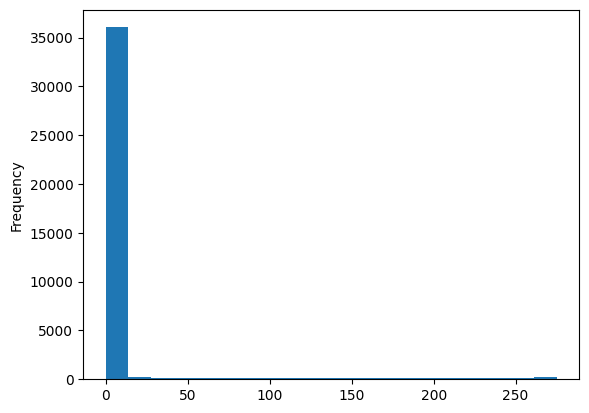

In [55]:
df['previous'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

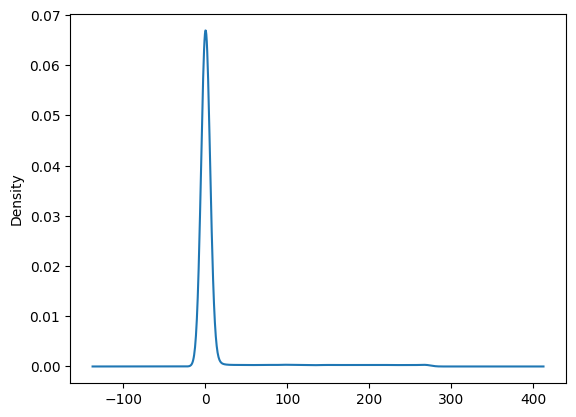

In [56]:
df['previous'].plot(kind='kde')

In [57]:
df['previous'].skew()

4.206572876950425

<Axes: >

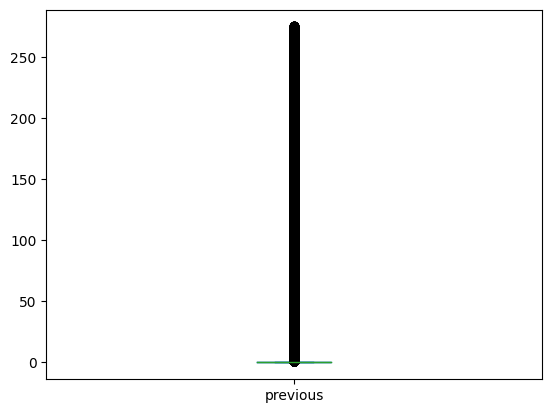

In [58]:
df['previous'].plot(kind='box')

In [59]:
df[(df['target']=='yes')]['previous'].describe()

count    5827.000000
mean       39.625536
std        75.242365
min         0.000000
25%         0.000000
50%         1.000000
75%        28.000000
max       275.000000
Name: previous, dtype: float64

In [60]:
df['previous'].isnull().sum()

0

## categorical data analysis

In [61]:
df['job'].value_counts()

job
blue-collar      7776
management       7462
technician       6078
admin.           4116
services         3325
self-employed    1862
retired          1824
entrepreneur     1805
unemployed       1685
housemaid        1656
student          1393
Name: count, dtype: int64

<Axes: ylabel='count'>

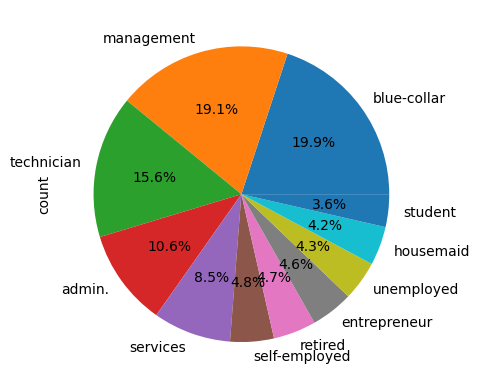

In [62]:
df['job'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

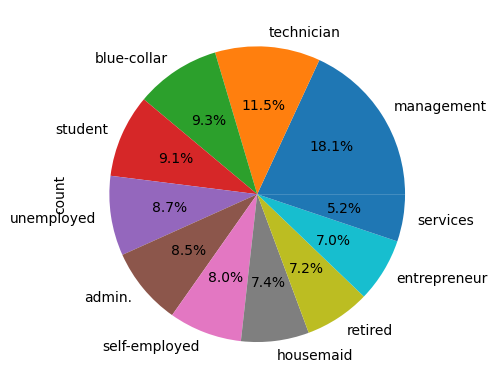

In [63]:
df[(df['target']=='yes')]['job'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [64]:
df['marital'].value_counts()

marital
married     22691
single      11250
divorced     5270
Name: count, dtype: int64

<Axes: ylabel='count'>

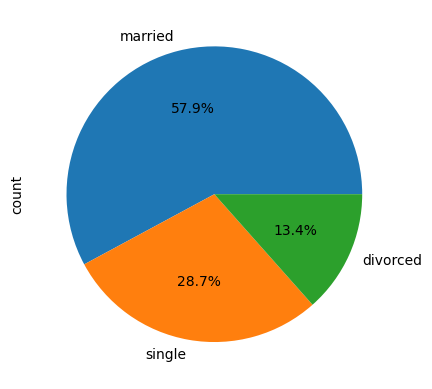

In [65]:
df['marital'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

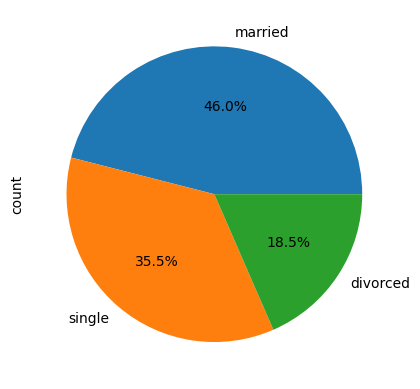

In [66]:
df[(df['target']=='yes')]['marital'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [67]:
df['education'].value_counts()

education
secondary    19584
tertiary     11615
primary       6545
Name: count, dtype: int64

<Axes: ylabel='count'>

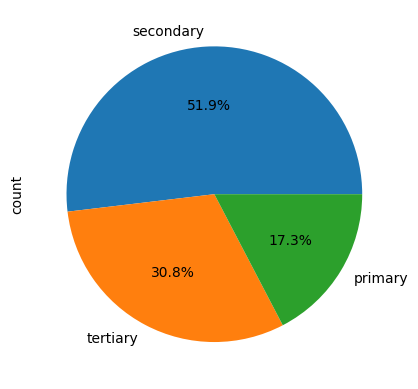

In [68]:
df['education'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [69]:
df['poutcome'].value_counts()

poutcome
failure    4949
other      2560
success    2251
Name: count, dtype: int64

<Axes: ylabel='count'>

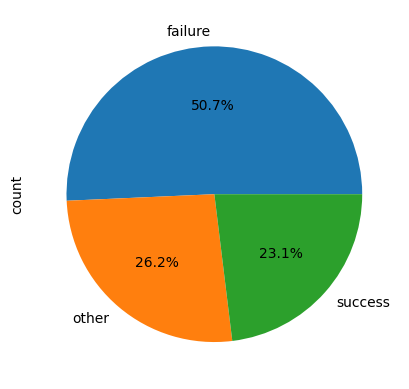

In [70]:
df['poutcome'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

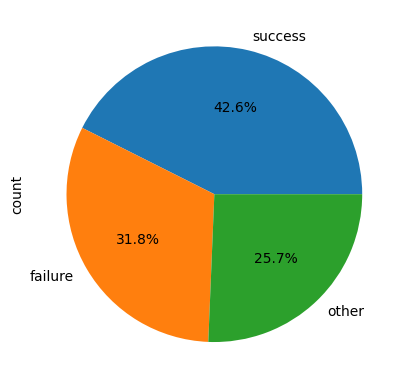

In [71]:
df[(df['target']=='yes')]['poutcome'].value_counts().plot(kind='pie',autopct='%0.1f%%')

## Bivariate analysis

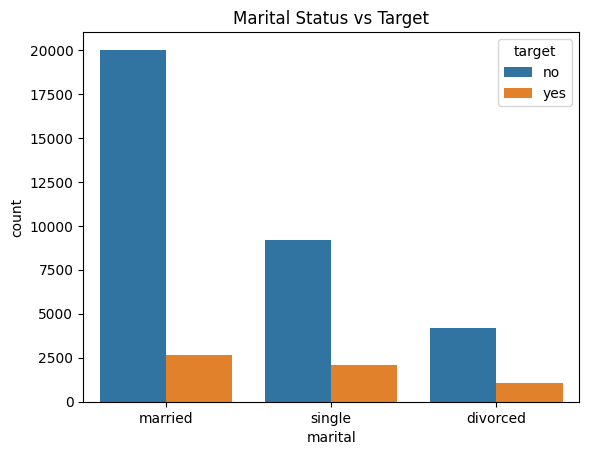

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='marital', hue='target', data=df)
plt.title('Marital Status vs Target')
plt.show()


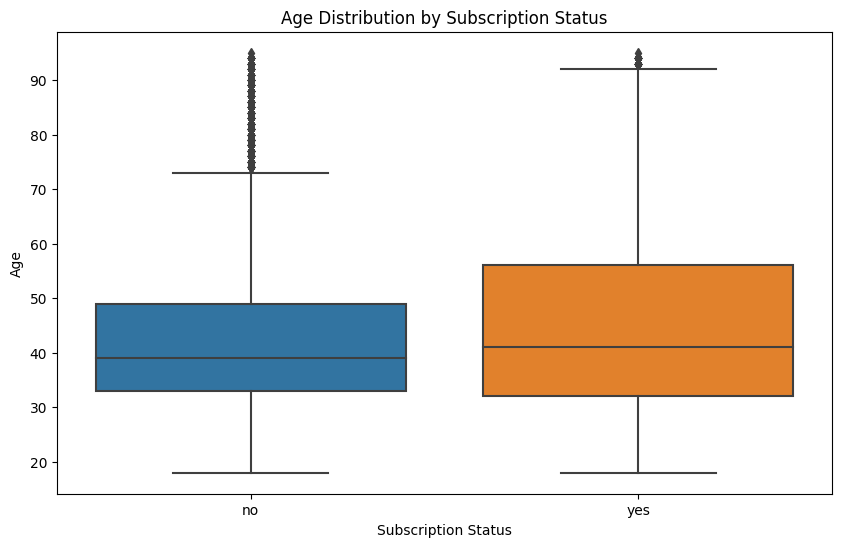

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target', y='age')
plt.title('Age Distribution by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Age')
plt.show()

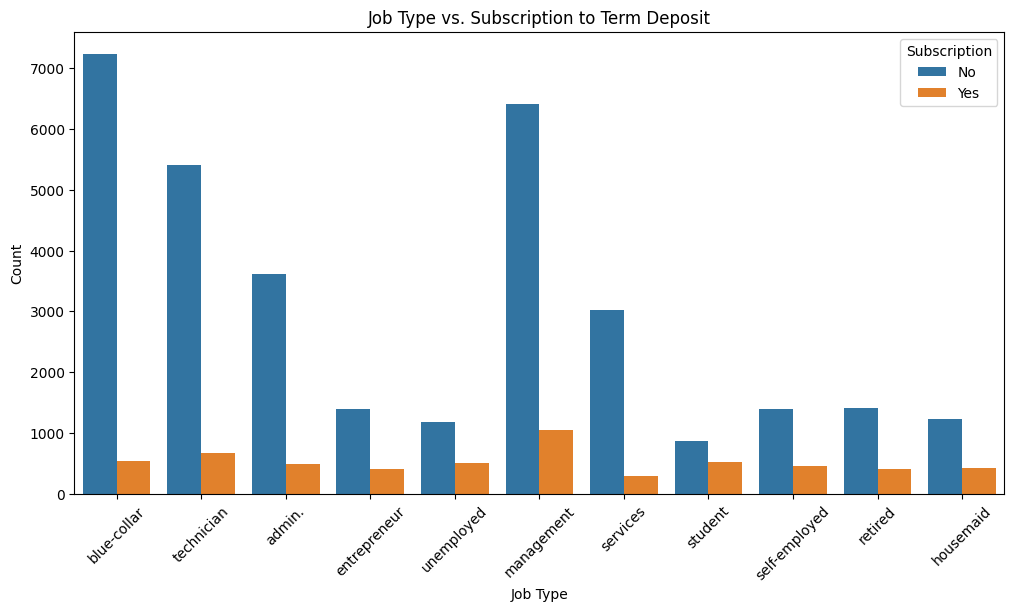

In [74]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', hue='target')
plt.title('Job Type vs. Subscription to Term Deposit')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscription', loc='upper right', labels=['No', 'Yes'])
plt.show()

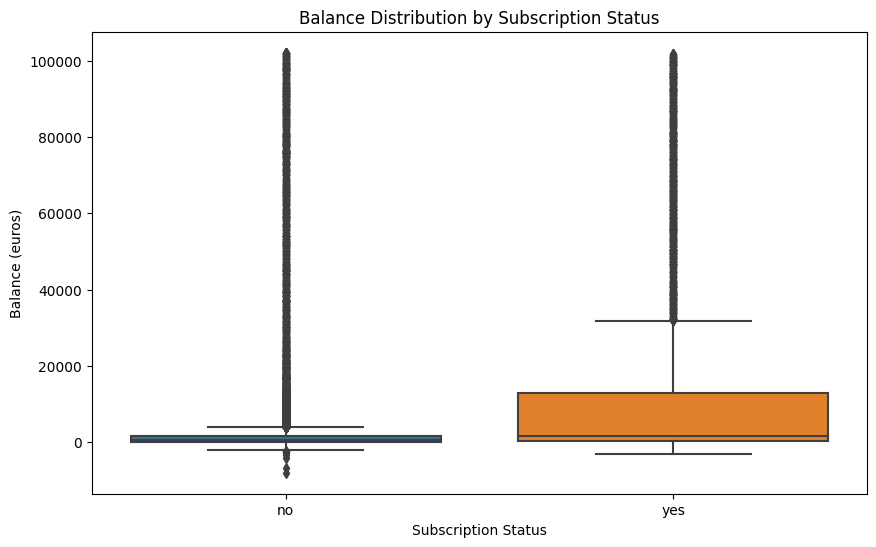

In [75]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target', y='balance')
plt.title('Balance Distribution by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Balance (euros)')
plt.show()

# model 1
* simple imputer used to fill in nan in jobs


In [76]:
# Create a copy of the dataframe
df_copy = df.copy(deep=True)
df_test = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')

# Drop 'last contact date' column
df_copy = df_copy.drop('last contact date', axis=1)
df_test = df_test.drop('last contact date', axis=1)

'''X = df_copy.drop('target', axis=1)
y = df_copy['target']'''

"X = df_copy.drop('target', axis=1)\ny = df_copy['target']"

In [77]:
df_copy.isnull().sum()

age              0
job            229
marital          0
education     1467
default          0
balance          0
housing          0
loan             0
contact      10336
duration         0
campaign         0
pdays            0
previous         0
poutcome     29451
target           0
dtype: int64

In [78]:
df_copy[df_copy['job'].isnull()]['target'].value_counts()

target
no     205
yes     24
Name: count, dtype: int64

In [79]:
df_copy[(df_copy['target']=='yes') & (df_copy['job'].isnull())]

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
2158,54,NaN,married,NaN,no,895,no,no,cellular,335,1,-1,0,NaN,yes
4391,33,NaN,married,secondary,no,335,no,no,cellular,891,2,177,7,failure,yes
5978,54,NaN,married,secondary,no,2206,no,no,cellular,449,1,91,3,success,yes
6216,54,NaN,married,secondary,no,2206,no,no,cellular,260,1,91,4,success,yes
9557,49,NaN,married,primary,no,341,yes,yes,NaN,520,2,-1,0,NaN,yes
13419,28,NaN,single,secondary,no,4465,no,no,cellular,769,1,-1,0,NaN,yes
15061,50,NaN,married,primary,no,341,yes,yes,cellular,670,4,340,2,success,yes
15579,41,NaN,single,NaN,no,942,no,no,cellular,219,1,-1,0,NaN,yes
16923,37,NaN,single,tertiary,no,0,no,no,cellular,257,2,97,1,success,yes
20573,54,NaN,married,secondary,no,2206,no,no,cellular,104,1,99,2,other,yes


In [80]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df_copy['job'] = imputer.fit_transform(df_copy[['job']]).ravel()
df_test['job'] = imputer.transform(df_test[['job']]).ravel()

In [81]:
df_copy['education'] = imputer.fit_transform(df_copy[['education']]).ravel()
df_test['education'] = imputer.transform(df_test[['education']]).ravel()

In [82]:
df_copy['education'].unique()

array(['secondary', 'tertiary', 'primary'], dtype=object)

In [83]:
df_copy[df_copy['contact'].isnull()]['target'].value_counts()

target
no     9919
yes     417
Name: count, dtype: int64

In [84]:
df_copy['contact'] = imputer.fit_transform(df_copy[['contact']]).ravel()
df_test['contact'] = imputer.transform(df_test[['contact']]).ravel()

In [85]:
df_copy['contact'].unique()

array(['cellular', 'telephone'], dtype=object)

In [86]:
df_copy[df_copy['poutcome'].isnull()]['target'].value_counts()

target
no     26723
yes     2728
Name: count, dtype: int64

In [87]:
df_copy['poutcome']=df_copy['poutcome'].fillna('unknown')
df_test['poutcome']=df_test['poutcome'].fillna('unknown')

In [88]:
df_copy.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
target       0
dtype: int64

## Random forest classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Apply one-hot encoding to the categorical features
df_encoded = pd.get_dummies(df_copy, drop_first=True)
test_encoded = pd.get_dummies(df_test, drop_first=True)

X_train = df_encoded.drop('target_yes', axis=1)  

y_train = df_encoded['target_yes']

x_test=pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")

# Initialize and fit the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set (predict class labels, not probabilities)
y_pred = model.predict(X_train)
y_pred2 = model.predict(test_encoded)

#print(y_pred2)

# Calculate the F1 score
f1 = f1_score(y_train, y_pred, average='macro')

print(f'F1 Score (Macro) on Training Data: {f1:.4f}')

'''submission = pd.DataFrame({'id':range(0,test_encoded.shape[0]),
                          'target':y_pred2})
                     
submission['target']=submission['target'].replace({False: 'no', True: 'yes'})

submission.to_csv('submission.csv',index=False)'''


F1 Score (Macro) on Training Data: 0.9998


"submission = pd.DataFrame({'id':range(0,test_encoded.shape[0]),\n                          'target':y_pred2})\n                     \nsubmission['target']=submission['target'].replace({False: 'no', True: 'yes'})\n\nsubmission.to_csv('submission.csv',index=False)"

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

df_encoded = pd.get_dummies(df_copy, drop_first=True)
test_encoded = pd.get_dummies(df_test, drop_first=True)

X_train = df_encoded.drop('target_yes', axis=1)  

y_train = df_encoded['target_yes']

x_test=pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_train)

y_pred2 = model.predict(test_encoded)

print(y_pred2)
# Calculate the F1 score
f1 = f1_score(y_train, y_pred, average='macro')
print(f'F1 Score (Macro) on Training Data: {f1:.4f}')

'''submission = pd.DataFrame({'id':range(0,test_encoded.shape[0]),
                          'target':y_pred2})
                     
submission['target']=submission['target'].replace({False: 'no', True: 'yes'})

submission.to_csv('submission.csv',index=False)'''

[False False False ... False False False]
F1 Score (Macro) on Training Data: 0.9998


"submission = pd.DataFrame({'id':range(0,test_encoded.shape[0]),\n                          'target':y_pred2})\n                     \nsubmission['target']=submission['target'].replace({False: 'no', True: 'yes'})\n\nsubmission.to_csv('submission.csv',index=False)"

In [91]:
'''submission.head()'''

'submission.head()'

In [92]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

df_encoded = pd.get_dummies(df_copy, drop_first=True)
test_encoded = pd.get_dummies(df_test, drop_first=True)

X_train = df_encoded.drop('target_yes', axis=1)  

y_train = df_encoded['target_yes']

x_test=pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")


model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
y_pred2 = model.predict(test_encoded)

print(y_pred2)
# Calculate the F1 score
f1 = f1_score(y_train, y_pred, average='macro')
print(f'F1 Score (Macro) on Training Data: {f1:.4f}')

'''submission = pd.DataFrame({'id':range(0,test_encoded.shape[0]),
                          'target':y_pred2})
                     
submission['target']=submission['target'].replace({False: 'no', True: 'yes'})

submission.to_csv('submission.csv',index=False)'''

[False False False ... False False False]
F1 Score (Macro) on Training Data: 0.5758


"submission = pd.DataFrame({'id':range(0,test_encoded.shape[0]),\n                          'target':y_pred2})\n                     \nsubmission['target']=submission['target'].replace({False: 'no', True: 'yes'})\n\nsubmission.to_csv('submission.csv',index=False)"

## xg boost

In [93]:
df_encoded.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,contact_telephone,poutcome_other,poutcome_success,poutcome_unknown,target_yes
0,26,647,357,2,331,1,True,False,False,False,...,True,False,False,True,False,False,True,False,False,False
1,52,553,160,1,-1,0,False,False,False,False,...,True,False,False,True,False,True,False,False,True,False
2,44,1397,326,1,-1,0,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
3,33,394,104,3,-1,0,False,False,False,False,...,True,False,False,True,False,True,False,False,True,False
4,31,137,445,2,-1,0,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False


In [94]:
import xgboost as xgb
from sklearn.metrics import f1_score

df_encoded = pd.get_dummies(df_copy, drop_first=True)
test_encoded = pd.get_dummies(df_test, drop_first=True)

X_train = df_encoded.drop('target_yes', axis=1)
y_train = df_encoded['target_yes']


# Initialize and fit XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_train)

y_pred2 = xgb_model.predict(test_encoded)

print(y_pred2)

f1 = f1_score(y_train, y_pred, average='macro')

print(f'F1 Score (Macro): {f1:.4f}')

submission = pd.DataFrame({'id':range(0,test_encoded.shape[0]),
                          'target':y_pred2})
                     
submission['target']=submission['target'].replace({0: 'no', 1: 'yes'})

submission.to_csv('submission.csv',index=False)

[0 0 0 ... 0 0 0]
F1 Score (Macro): 0.8511


In [95]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
import pandas as pd

# Ensure train and test data have the same columns by aligning dummy encoding
df_encoded = pd.get_dummies(df_copy, drop_first=True)
test_encoded = pd.get_dummies(df_test, drop_first=True)

# Align test_encoded columns with df_encoded
test_encoded = test_encoded.reindex(columns=df_encoded.columns.drop('target_yes'), fill_value=0)

# Define X_train, y_train
X_train = df_encoded.drop('target_yes', axis=1)
y_train = df_encoded['target_yes']

# Initialize and fit XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)

# Fit without eval_set (if not doing early stopping)
xgb_model.fit(X_train, y_train)

# Predict on the training set
y_pred = xgb_model.predict(X_train)

# Predict on the test set
y_pred2 = xgb_model.predict(test_encoded)

# Calculate F1 Score (Macro) on the training set
f1 = f1_score(y_train, y_pred, average='macro')
print(f'F1 Score (Macro): {f1:.4f}')

'''submission = pd.DataFrame({'id':range(0,test_encoded.shape[0]),
                          'target':y_pred2})
                     
submission['target']=submission['target'].replace({0: 'no', 1: 'yes'})

submission.to_csv('submission.csv',index=False)'''

F1 Score (Macro): 0.8511


"submission = pd.DataFrame({'id':range(0,test_encoded.shape[0]),\n                          'target':y_pred2})\n                     \nsubmission['target']=submission['target'].replace({0: 'no', 1: 'yes'})\n\nsubmission.to_csv('submission.csv',index=False)"

## ridge regression

In [96]:
'''from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit Logistic Regression with Ridge (L2 regularization)
ridge = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)
ridge.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge.predict(X_test)

# Calculate F1 Score (Macro)
f1 = f1_score(y_test, y_pred, average='macro')
print(f'Ridge F1 Score (Macro): {f1:.4f}')'''


"from sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import f1_score\nfrom sklearn.model_selection import train_test_split\n\n\n# Split the data into training and test sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Initialize and fit Logistic Regression with Ridge (L2 regularization)\nridge = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)\nridge.fit(X_train, y_train)\n\n# Predict on the test set\ny_pred = ridge.predict(X_test)\n\n# Calculate F1 Score (Macro)\nf1 = f1_score(y_test, y_pred, average='macro')\nprint(f'Ridge F1 Score (Macro): {f1:.4f}')"

In [97]:
'''from sklearn.linear_model import LogisticRegression

# Initialize and fit Logistic Regression with Lasso (L1 regularization)
lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
lasso.fit(X_train, y_train)

# Predict and calculate F1 score
y_pred = lasso.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
print(f'Lasso F1 Score (Macro): {f1:.4f}')'''


"from sklearn.linear_model import LogisticRegression\n\n# Initialize and fit Logistic Regression with Lasso (L1 regularization)\nlasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)\nlasso.fit(X_train, y_train)\n\n# Predict and calculate F1 score\ny_pred = lasso.predict(X_test)\nf1 = f1_score(y_test, y_pred, average='macro')\nprint(f'Lasso F1 Score (Macro): {f1:.4f}')"

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

df_encoded = pd.get_dummies(df_copy, drop_first=True)
test_encoded = pd.get_dummies(df_test, drop_first=True)

X_train = df_encoded.drop('target_yes', axis=1)
y_train = df_encoded['target_yes']

X_train = df_encoded.drop('target_yes', axis=1)
y_train = df_encoded['target_yes']
X_test = test_encoded

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=2000, random_state=42)
elasticnet.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = elasticnet.predict(X_test_scaled)


'''submission = pd.DataFrame({'id':range(0,test_encoded.shape[0]),
                          'target':y_pred2})
                     
submission['target']=submission['target'].replace({0: 'no', 1: 'yes'})

submission.to_csv('submission.csv',index=False)'''


"submission = pd.DataFrame({'id':range(0,test_encoded.shape[0]),\n                          'target':y_pred2})\n                     \nsubmission['target']=submission['target'].replace({0: 'no', 1: 'yes'})\n\nsubmission.to_csv('submission.csv',index=False)"

In [99]:
submission.head()

,id,target
0,0,no
1,1,no
2,2,no
3,3,no
4,4,yes


## Random forest hypertuned


In [100]:
'''from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV

df_encoded = pd.get_dummies(df_copy, drop_first=True)
test_encoded = pd.get_dummies(df_test, drop_first=True)

X_train = df_encoded.drop('target_yes', axis=1)
y_train = df_encoded['target_yes']

X_train = df_encoded.drop('target_yes', axis=1)
y_train = df_encoded['target_yes']
X_test = test_encoded

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rfh = RandomForestClassifier()

params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': list(np.arange(2, 21)),  # Adjusted upper limit
    'min_samples_leaf': list(np.arange(1, 21)),   # Lowered lower limit to 1
    'max_features': ['sqrt', 'log2', None, 0.5, 0.8],  # Added fractions
    'n_estimators': [100, 200,1000]  # Consider a range of estimators
}

nrf = RandomizedSearchCV(rfh, param_distributions=params, scoring='f1_macro', random_state=42, n_jobs=-1, cv=10)

nrf.fit(X_train_scaled,y_train)

# Output the best parameters and best score
print(nrf.best_params_)
print(nrf.best_score_)

# Get the best estimator
nrf = nrf.best_estimator_

y_pred=nrf.predict(X_test_scaled)

submission = pd.DataFrame({'id':range(0,y_pred.shape[0]),
                          'target':y_pred})
                     
submission['target']=submission['target'].replace({False: 'no', True: 'yes'})

submission.to_csv('submission.csv',index=False)
'''

"from sklearn.preprocessing import StandardScaler\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import f1_score\nfrom sklearn.model_selection import RandomizedSearchCV\n\ndf_encoded = pd.get_dummies(df_copy, drop_first=True)\ntest_encoded = pd.get_dummies(df_test, drop_first=True)\n\nX_train = df_encoded.drop('target_yes', axis=1)\ny_train = df_encoded['target_yes']\n\nX_train = df_encoded.drop('target_yes', axis=1)\ny_train = df_encoded['target_yes']\nX_test = test_encoded\n\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train)\nX_test_scaled = scaler.transform(X_test)\n\nrfh = RandomForestClassifier()\n\nparams = {\n    'criterion': ['gini', 'entropy'],\n    'min_samples_split': list(np.arange(2, 21)),  # Adjusted upper limit\n    'min_samples_leaf': list(np.arange(1, 21)),   # Lowered lower limit to 1\n    'max_features': ['sqrt', 'log2', None, 0.5, 0.8],  # Added fractions\n    'n_estimators': [100, 200,1000]  # Consider a range of 

In [101]:
#v26
from sklearn.ensemble import RandomForestClassifier

rd=RandomForestClassifier(n_estimators=200,min_samples_split=18,min_samples_leaf=18,max_features=0.8,criterion='gini',class_weight="balanced")
df_encoded = pd.get_dummies(df_copy, drop_first=True)
test_encoded = pd.get_dummies(df_test, drop_first=True)

X_train = df_encoded.drop('target_yes', axis=1)
y_train = df_encoded['target_yes']

X_train = df_encoded.drop('target_yes', axis=1)
y_train = df_encoded['target_yes']
X_test = test_encoded

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
rd.fit(X_train_scaled,y_train)
y_pred=rd.predict(X_test_scaled)

submission = pd.DataFrame({'id':range(0,y_pred.shape[0]),
                          'target':y_pred})
                     
submission['target']=submission['target'].replace({False: 'no', True: 'yes'})

submission.to_csv('submission.csv',index=False)

In [102]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
import pandas as pd

# Ensure train and test data have the same columns by aligning dummy encoding
df_encoded = pd.get_dummies(df_copy, drop_first=True)
test_encoded = pd.get_dummies(df_test, drop_first=True)

# Align test_encoded columns with df_encoded
test_encoded = test_encoded.reindex(columns=df_encoded.columns.drop('target_yes'), fill_value=0)

# Define X_train, y_train
X_train = df_encoded.drop('target_yes', axis=1)
y_train = df_encoded['target_yes']

# Define parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 1, 5]
}

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Randomized search with 3-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,  # Increase this for a more thorough search
    scoring='f1_macro',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit randomized search
random_search.fit(X_train, y_train)

# Display the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best F1 Score (Macro) from cross-validation: {random_search.best_score_:.4f}")

# Predict on the training set using best model
best_model = random_search.best_estimator_
y_pred_train = best_model.predict(X_train)
f1_train = f1_score(y_train, y_pred_train, average='macro')
print(f'Training F1 Score (Macro): {f1_train:.4f}')

# Predict on the test set
y_pred_test = best_model.predict(test_encoded)

# Prepare the submission
'''submission = pd.DataFrame({'id': range(0, test_encoded.shape[0]), 'target': y_pred_test})
submission['target'] = submission['target'].replace({0: 'no', 1: 'yes'})
submission.to_csv('submission.csv', index=False)'''

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.6, 'reg_lambda': 5, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
Best F1 Score (Macro) from cross-validation: 0.7111
Training F1 Score (Macro): 0.8124


"submission = pd.DataFrame({'id': range(0, test_encoded.shape[0]), 'target': y_pred_test})\nsubmission['target'] = submission['target'].replace({0: 'no', 1: 'yes'})\nsubmission.to_csv('submission.csv', index=False)"

In [103]:
'''import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
import pandas as pd

# Ensure train and test data have the same columns by aligning dummy encoding
df_encoded = pd.get_dummies(df_copy, drop_first=True)
test_encoded = pd.get_dummies(df_test, drop_first=True)

# Align test_encoded columns with df_encoded
test_encoded = test_encoded.reindex(columns=df_encoded.columns.drop('target_yes'), fill_value=0)

# Define X_train, y_train
X_train = df_encoded.drop('target_yes', axis=1)
y_train = df_encoded['target_yes']

# Define parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.05, 0.075,0.1, 0.2],
    'max_depth': [5,6,7],
    'n_estimators': [ 300,500],
    'subsample': [ 0.8,0.85],
    'colsample_bytree': [0.6,0.7],
    'gamma': [0, 0.05],
    'reg_alpha': [0.1, 0.15],
    'reg_lambda': [ 1, 3]
}

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Randomized search with 3-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,  # Increase this for a more thorough search
    scoring='f1_macro',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit randomized search
random_search.fit(X_train, y_train)

# Display the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best F1 Score (Macro) from cross-validation: {random_search.best_score_:.4f}")

# Predict on the training set using best model
best_model = random_search.best_estimator_
y_pred_train = best_model.predict(X_train)
f1_train = f1_score(y_train, y_pred_train, average='macro')
print(f'Training F1 Score (Macro): {f1_train:.4f}')

# Predict on the test set
y_pred_test = best_model.predict(test_encoded)

# Prepare the submission
submission = pd.DataFrame({'id': range(0, test_encoded.shape[0]), 'target': y_pred_test})
submission['target'] = submission['target'].replace({0: 'no', 1: 'yes'})
submission.to_csv('submission.csv', index=False)
'''

'import xgboost as xgb\nfrom xgboost import XGBClassifier\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.metrics import f1_score\nimport pandas as pd\n\n# Ensure train and test data have the same columns by aligning dummy encoding\ndf_encoded = pd.get_dummies(df_copy, drop_first=True)\ntest_encoded = pd.get_dummies(df_test, drop_first=True)\n\n# Align test_encoded columns with df_encoded\ntest_encoded = test_encoded.reindex(columns=df_encoded.columns.drop(\'target_yes\'), fill_value=0)\n\n# Define X_train, y_train\nX_train = df_encoded.drop(\'target_yes\', axis=1)\ny_train = df_encoded[\'target_yes\']\n\n# Define parameter grid for hyperparameter tuning\nparam_grid = {\n    \'learning_rate\': [0.05, 0.075,0.1, 0.2],\n    \'max_depth\': [5,6,7],\n    \'n_estimators\': [ 300,500],\n    \'subsample\': [ 0.8,0.85],\n    \'colsample_bytree\': [0.6,0.7],\n    \'gamma\': [0, 0.05],\n    \'reg_alpha\': [0.1, 0.15],\n    \'reg_lambda\': [ 1, 3]\n}\n\n# Initialize XGBoost 

In [104]:
#v25
'''from sklearn.svm import SVC


# Ensure train and test data have the same columns by aligning dummy encoding
df_encoded = pd.get_dummies(df_copy, drop_first=True)
test_encoded = pd.get_dummies(df_test, drop_first=True)

# Align test_encoded columns with df_encoded
test_encoded = test_encoded.reindex(columns=df_encoded.columns.drop('target_yes'), fill_value=0)

# Define X_train, y_train
X_train = df_encoded.drop('target_yes', axis=1)
y_train = df_encoded['target_yes']


model = SVC(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred_test = model.predict(test_encoded)


# Prepare the submission
submission = pd.DataFrame({'id': range(0, y_pred_test.shape[0]), 'target': y_pred_test})
submission['target'] = submission['target'].replace({False: 'no', True: 'yes'})
submission.to_csv('submission.csv', index=False)'''


"from sklearn.svm import SVC\n\n\n# Ensure train and test data have the same columns by aligning dummy encoding\ndf_encoded = pd.get_dummies(df_copy, drop_first=True)\ntest_encoded = pd.get_dummies(df_test, drop_first=True)\n\n# Align test_encoded columns with df_encoded\ntest_encoded = test_encoded.reindex(columns=df_encoded.columns.drop('target_yes'), fill_value=0)\n\n# Define X_train, y_train\nX_train = df_encoded.drop('target_yes', axis=1)\ny_train = df_encoded['target_yes']\n\n\nmodel = SVC(class_weight='balanced', random_state=42)\nmodel.fit(X_train, y_train)\ny_pred_test = model.predict(test_encoded)\n\n\n# Prepare the submission\nsubmission = pd.DataFrame({'id': range(0, y_pred_test.shape[0]), 'target': y_pred_test})\nsubmission['target'] = submission['target'].replace({False: 'no', True: 'yes'})\nsubmission.to_csv('submission.csv', index=False)"

In [105]:
'''!rm submission.csv'''

'!rm submission.csv'

In [106]:
#27
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
import pandas as pd

# Ensure train and test data have the same columns by aligning dummy encoding
df_encoded = pd.get_dummies(df_copy, drop_first=True)
test_encoded = pd.get_dummies(df_test, drop_first=True)

# Align test_encoded columns with df_encoded
test_encoded = test_encoded.reindex(columns=df_encoded.columns.drop('target_yes'), fill_value=0)

# Define X_train, y_train
X_train = df_encoded.drop('target_yes', axis=1)
y_train = df_encoded['target_yes']

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Initialize and fit XGBoost Classifier
xgb_model = XGBClassifier(random_state=42,scale_pos_weight=scale_pos_weight)

# Fit without eval_set (if not doing early stopping)
xgb_model.fit(X_train, y_train)

# Predict on the training set
y_pred = xgb_model.predict(X_train)

# Predict on the test set
y_pred2 = xgb_model.predict(test_encoded)

# Calculate F1 Score (Macro) on the training set
f1 = f1_score(y_train, y_pred, average='macro')
print(f'F1 Score (Macro): {f1:.4f}')

'''submission = pd.DataFrame({'id':range(0,test_encoded.shape[0]),
                          'target':y_pred2})
                     
submission['target']=submission['target'].replace({0: 'no', 1: 'yes'})

submission.to_csv('submission.csv',index=False)'''

F1 Score (Macro): 0.7975


"submission = pd.DataFrame({'id':range(0,test_encoded.shape[0]),\n                          'target':y_pred2})\n                     \nsubmission['target']=submission['target'].replace({0: 'no', 1: 'yes'})\n\nsubmission.to_csv('submission.csv',index=False)"

In [107]:
#28
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
import pandas as pd

# Ensure train and test data have the same columns by aligning dummy encoding
df_encoded = pd.get_dummies(df_copy, drop_first=True)
test_encoded = pd.get_dummies(df_test, drop_first=True)

# Align test_encoded columns with df_encoded
test_encoded = test_encoded.reindex(columns=df_encoded.columns.drop('target_yes'), fill_value=0)

# Define X_train, y_train
X_train = df_encoded.drop('target_yes', axis=1)
y_train = df_encoded['target_yes']

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

params = {
    'subsample': 0.6,
    'reg_lambda': 5,
    'reg_alpha': 0.1,
    'n_estimators': 200,
    'max_depth': 7,
    'learning_rate': 0.05,
    'gamma': 0,
    'colsample_bytree': 1.0,
    'scale_pos_weight': scale_pos_weight  # for handling class imbalance
}

# Initialize and fit XGBoost Classifier
xgb_model = XGBClassifier(random_state=42,**params)

# Fit without eval_set (if not doing early stopping)
xgb_model.fit(X_train, y_train)

# Predict on the training set
y_pred = xgb_model.predict(X_train)

# Predict on the test set
y_pred2 = xgb_model.predict(test_encoded)

# Calculate F1 Score (Macro) on the training set
f1 = f1_score(y_train, y_pred, average='macro')
print(f'F1 Score (Macro): {f1:.4f}')

submission = pd.DataFrame({'id':range(0,test_encoded.shape[0]),
                          'target':y_pred2})
                     
submission['target']=submission['target'].replace({0: 'no', 1: 'yes'})

submission.to_csv('submission.csv',index=False)

F1 Score (Macro): 0.7613
